# Exploration Data Analysis

### Objective 
- Analyze the Ames Housing dataset to understand the key variables that affect housing prices and prepare the data for moddeling

### goal
identify few things :  
1. missing vaues
2. important features (feature enginering)
3. outliers
4. feature distribution

## import required libraries

In [38]:
#data manipulation 
import numpy as np 
import pandas as pd 

# data visualization 
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', 100)
import warnings
warnings.filterwarnings('ignore')

# import logging function
from src.logger import logging


In [39]:
# random seed for reproducibility
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)


## Load the data 

In [40]:
# Load dataset
df = pd.read_csv("../data/AmesHousing.csv")
print(df.shape)
df.head()


(2930, 82)


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,NaN,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


We have about 2,930 rows and 83 columns to investigate. I hope I can do my best with this dataset and learn a lot about data science.

In [41]:
# copy the dataset
data = df.copy()

logging.info('ames dataset sucessfully loaded')

## Check for dataset info and summary

In [42]:
# data structure and types
data.info()

# descriptive statistic for the dataset
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,2929.000000,2929.000000,2929.000000,2929.000000,2930.000000,2930.000000,2930.000000,2930.000000,2928.000000,2928.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2771.000000,2929.000000,2929.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,442.629566,49.722431,559.262547,1051.614544,1159.557679,335.455973,4.676792,1499.690444,0.431352,0.061134,1.566553,0.379522,2.854266,1.044369,6.443003,0.599317,1978.132443,1.766815,472.819734,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,455.590839,169.168476,439.494153,440.615067,391.890885,428.395715,46.310510,505.508887,0.524820,0.245254,0.552941,0.502629,0.827731,0.214076,1.572964,0.647921,25.528411,0.760566,215.046549,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,0.000000,219.000000,793.000000,876.250000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,370.000000,0.000000,466.000000,990.000000,1084.000000,0.000000,0.000000,1442.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,734.000000,0.000000,802.000000,1302.000000,1384.000000,703.750000,0.000000,1742.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


### insight
1. there are 2930 rows and 82 columns
2. there are several columns that have missing values such as lot frontage (-490) and Alley columns (-2732), will then be handled either with one of these ways : dropping the columns or imputaion(mean, median, domain aware startergy)
3. There are many columns with the data type object. These columns will be categorized as nominal, ordinal, or numerical, and will then be handled using encoding techniques such as label encoding, one-hot encoding, or target encoding.
4. target variable is in int64 which is suitable for regrerssion
 

## Preview target variable

Text(0.5, 1.0, 'distibution of sale price')

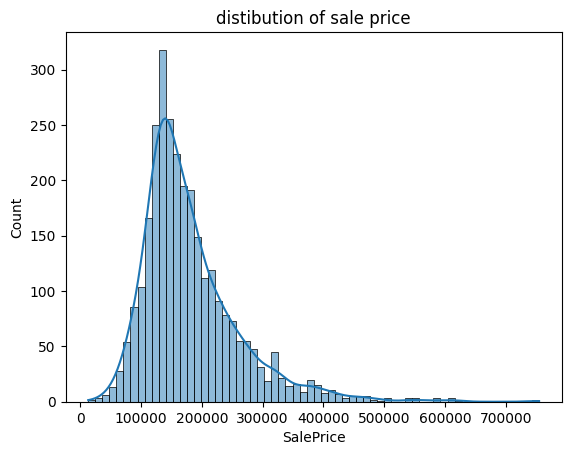

In [43]:
sns.histplot(data['SalePrice'], kde= True)
plt.title('distibution of sale price')

## handling missing values
We’ll break this into 3 parts:

- Visualize missing values

- Summarize and classify missing columns

- Impute / drop based on type and reason

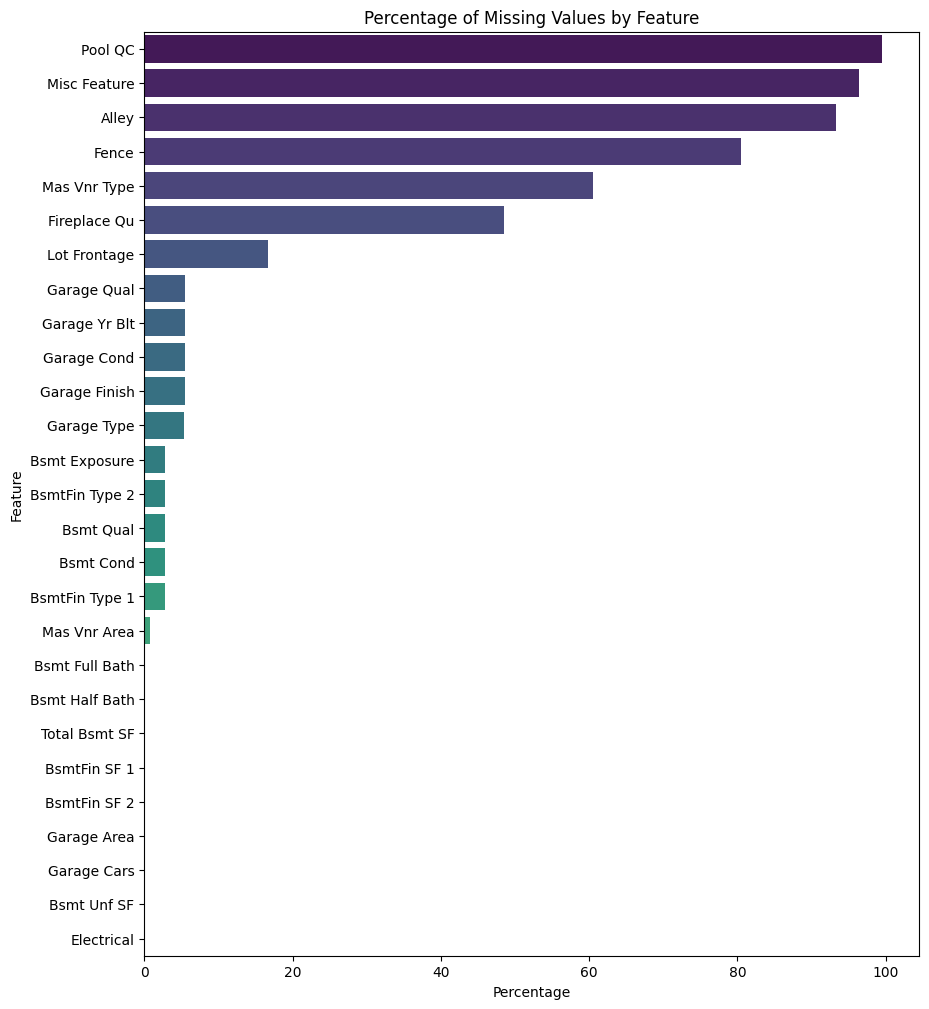

Pool QC           99.556314
Misc Feature      96.382253
Alley             93.242321
Fence             80.477816
Mas Vnr Type      60.580205
Fireplace Qu      48.532423
Lot Frontage      16.723549
Garage Qual        5.426621
Garage Yr Blt      5.426621
Garage Cond        5.426621
Garage Finish      5.426621
Garage Type        5.358362
Bsmt Exposure      2.832765
BsmtFin Type 2     2.764505
Bsmt Qual          2.730375
Bsmt Cond          2.730375
BsmtFin Type 1     2.730375
Mas Vnr Area       0.784983
Bsmt Full Bath     0.068259
Bsmt Half Bath     0.068259
Total Bsmt SF      0.034130
BsmtFin SF 1       0.034130
BsmtFin SF 2       0.034130
Garage Area        0.034130
Garage Cars        0.034130
Bsmt Unf SF        0.034130
Electrical         0.034130
dtype: float64

In [44]:

missing_percent = data.isnull().mean().sort_values(ascending= False) * 100
missing_cols = missing_percent[missing_percent > 0]
missing_cols


# visualize missing values
plt.figure(figsize=(10, 12))
sns.barplot(x=missing_cols.values, y=missing_cols.index, palette="viridis")
plt.title("Percentage of Missing Values by Feature")
plt.xlabel("Percentage")
plt.ylabel("Feature")
plt.show()

missing_cols

In [45]:

# Quick classification (basic)
structural_missing = [col for col in data.columns if data[col].dtype == 'object' and missing_percent[col] > 0]
numerical_missing = [col for col in data.columns if data[col].dtype != 'object' and missing_percent[col] > 0]
rare = [col for col in missing_percent.index if missing_percent[col] > 95]

print(structural_missing)
print(numerical_missing)
print(rare)


['Alley', 'Mas Vnr Type', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Electrical', 'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Pool QC', 'Fence', 'Misc Feature']
['Lot Frontage', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Garage Yr Blt', 'Garage Cars', 'Garage Area']
['Pool QC', 'Misc Feature']


### handling structural missing values

In [46]:
import pandas as pd

# STRUCTURAL: Fill with 'None' (absence means not applicable)
structural_cols = [
    "Pool QC", "Misc Feature", "Alley", "Fence", "Fireplace Qu",
    "Garage Qual", "Garage Cond", "Garage Finish", "Garage Type",
    "Bsmt Exposure", "BsmtFin Type 1", "BsmtFin Type 2",
    "Bsmt Cond", "Bsmt Qual", "Mas Vnr Type"
]
for col in structural_cols:
    data[col] = data[col].fillna("None")

# NUMERICAL: Fill with 0 (when 'None' logically means 0)
zero_fill_cols = [
    "Mas Vnr Area", "Garage Yr Blt", "Bsmt Full Bath", "Bsmt Half Bath",
    "BsmtFin SF 1", "BsmtFin SF 2", "Bsmt Unf SF", "Garage Cars",
    "Garage Area", "Total Bsmt SF"
]
for col in zero_fill_cols:
    data[col] = data[col].fillna(0)

# NUMERICAL: Impute Lot Frontage using median by Neighborhood
data["Lot Frontage"] = data.groupby("Neighborhood")["Lot Frontage"].transform(
    lambda x: x.fillna(x.median())
)

# CATEGORICAL: Fill Electrical with mode
data["Electrical"] = data["Electrical"].fillna(data["Electrical"].mode()[0])

# RARE: Option 1 - Drop highly sparse columns
# data.drop(columns=["Pool QC", "Misc Feature"], inplace=True)

# RARE: Option 2 - Convert to binary flag
data["Has_Pool"] = data["Pool QC"].apply(lambda x: 0 if x == "None" else 1)
data["Has_Misc"] = data["Misc Feature"].apply(lambda x: 0 if x == "None" else 1)

# ✅ Final Check
missing_summary = data.isnull().sum().sort_values(ascending=False)
print("Remaining missing values:")
print(missing_summary[missing_summary > 0])

logging.info("handling missing value is done")


Remaining missing values:
Lot Frontage    3
dtype: int64


in real life the way we handle missing value is by talking to a domain expert or read documentation to understand the reason for the missing values, some missing values will be very valuable to help our model predict, missing them will affect the result of the prediction. we need to identify the types of the missing values, because different types have different stratergies to handle them. there are few things that should be avoided during handling missing values:
1. fill all missing values with 0 blidly(	It distorts the meaning for real values)
2. drop rows with missing values ( we will lose too much information that will probably help our prediction)
3. use mean for skewed data (mean is affectedd by otliers, use median instead)
4. skip domain review (it will lead to misunderstanding why the values are missing)

## Handling outliers

Outliers can distort a model, so detecting and handling them wisely can improve prediction performance. Outliers typically occur in numerical columns. 
we will first detect them with several methods such as :

Interquartile Range (IQR)

Boxplot visualization

Z-score (used when the data is normally distributed)

###  A.IQR (Interquartile Range) Method


In [47]:
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outlier_count = data[(data[col] < lower) | (data[col] > upper)].shape[0]
    if outlier_count > 0:
        print(f"{col}: {outlier_count} outliers")


MS SubClass: 208 outliers
Lot Frontage: 206 outliers
Lot Area: 127 outliers
Overall Qual: 4 outliers
Overall Cond: 252 outliers
Year Built: 9 outliers
Mas Vnr Area: 203 outliers
BsmtFin SF 1: 15 outliers
BsmtFin SF 2: 351 outliers
Bsmt Unf SF: 56 outliers
Total Bsmt SF: 124 outliers
1st Flr SF: 43 outliers
2nd Flr SF: 8 outliers
Low Qual Fin SF: 40 outliers
Gr Liv Area: 75 outliers
Bsmt Full Bath: 2 outliers
Bsmt Half Bath: 175 outliers
Full Bath: 4 outliers
Bedroom AbvGr: 78 outliers
Kitchen AbvGr: 134 outliers
TotRms AbvGrd: 51 outliers
Fireplaces: 13 outliers
Garage Yr Blt: 160 outliers
Garage Cars: 17 outliers
Garage Area: 42 outliers
Wood Deck SF: 67 outliers
Open Porch SF: 159 outliers
Enclosed Porch: 459 outliers
3Ssn Porch: 37 outliers
Screen Porch: 256 outliers
Pool Area: 13 outliers
Misc Val: 103 outliers
SalePrice: 137 outliers
Has_Pool: 13 outliers
Has_Misc: 106 outliers


### Z-score (used when the data isnormally distributed)

In [48]:
from scipy.stats import zscore

z_scores = zscore(data[numeric_cols])
outliers = (abs(z_scores) > 3).sum(axis=0)
outlier_report = pd.Series(outliers, index=numeric_cols)
print(outlier_report[outlier_report > 0])

MS SubClass         61
Lot Area            29
Overall Qual         4
Overall Cond        58
Year Built           8
Mas Vnr Area        63
BsmtFin SF 1        17
BsmtFin SF 2        92
Bsmt Unf SF         16
Total Bsmt SF       21
1st Flr SF          29
2nd Flr SF          10
Low Qual Fin SF     31
Gr Liv Area         25
Bsmt Full Bath       2
Bsmt Half Bath     175
Full Bath            4
Half Bath           25
Bedroom AbvGr       30
Kitchen AbvGr      134
TotRms AbvGrd       19
Fireplaces          13
Garage Yr Blt      159
Garage Cars          1
Garage Area         17
Wood Deck SF        42
Open Porch SF       52
Enclosed Porch      88
3Ssn Porch          36
Screen Porch       107
Pool Area           13
Misc Val            19
SalePrice           45
Has_Pool            13
Has_Misc           106
dtype: int64


outliers that have been detected by both methods IQR and Z-score are different. this is normal because Z-score assume the data to be normally distributed unlike IQR. in real-life application IQR is better than the Z-score. i just mentioned Z-score methid here to detect outliers only for the sake of learning

### Boxplot Visualization (Quick Insight)

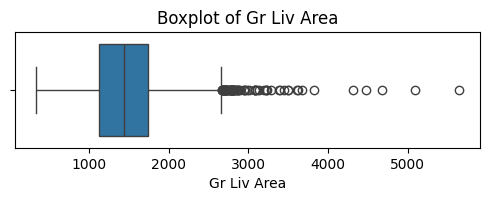

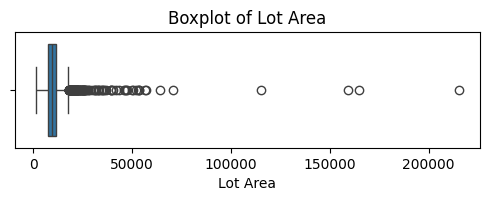

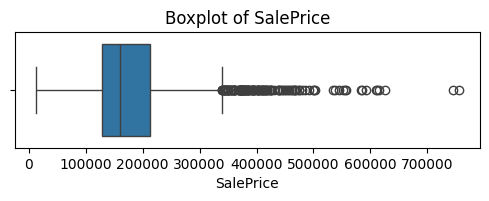

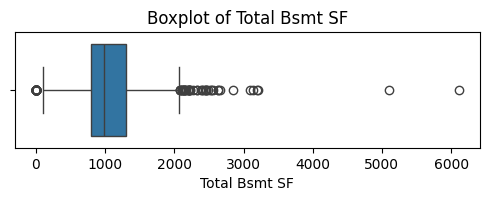

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in ['Gr Liv Area', 'Lot Area', 'SalePrice', 'Total Bsmt SF']:
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

insight : if there are dots far beyond the whiskers, it means that the data has outliers and should be handled repectfully later on

In [50]:
# outliers function detection 
def outlier_summary(df, cols):
    summary = []
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower) | (df[col] > upper)]
        summary.append((col, outliers.shape[0]))
    return pd.DataFrame(summary, columns=['Feature', 'Outlier Count']).sort_values(by='Outlier Count', ascending=False)

outlier_summary(data, numeric_cols)

,Feature,Outlier Count
31,Enclosed Porch,459
11,BsmtFin SF 2,351
33,Screen Porch,256
6,Overall Cond,252
2,MS SubClass,208
3,Lot Frontage,206
9,Mas Vnr Area,203
19,Bsmt Half Bath,175
26,Garage Yr Blt,160
30,Open Porch SF,159


### Handling outliers
The way outliers should be handled depends on their types. Not all outliers need to be removed from the data — some outliers are valid and carry important information.

In [51]:
# reusable function to handle outliers
def cap_outliers(df, col, lower_q=0.01, upper_q=0.99):
    """
    Caps values in a column at the lower and upper quantiles.
    """
    lower = df[col].quantile(lower_q)
    upper = df[col].quantile(upper_q)
    df[col] = np.clip(df[col], lower, upper)
    print(f"[✔] Capped {col} at {lower_q*100:.0f}th and {upper_q*100:.0f}th percentiles.")


def log_transform(df, col):
    """
    Applies log1p (log(1 + x)) transformation to handle skew.
    """
    new_col = f"{col}_log"
    df[new_col] = np.log1p(df[col])
    print(f"[✔] Applied log transformation on {col} → {new_col}")


def create_flag(df, col, condition=None, flag_name=None):
    """
    Creates a binary flag column for unusual values.
    """
    if not flag_name:
        flag_name = f"Flag_{col}"
    if not condition:
        # Default: flag if value > 0
        df[flag_name] = (df[col] > 0).astype(int)
    else:
        df[flag_name] = condition(df[col]).astype(int)
    print(f"[✔] Created flag column: {flag_name}")


In [52]:
# LOG TRANSFORM
log_transform(data, 'SalePrice')
log_transform(data, 'Gr Liv Area')

# CAPPING
for col in ['Gr Liv Area', 'Lot Area', 'Total Bsmt SF', 'Open Porch SF', 'Screen Porch', 'Enclosed Porch']:
    cap_outliers(data, col)

# FLAGGING
create_flag(data, 'Misc Val')  # flag if > 0
create_flag(data, 'BsmtFin SF 2', condition=lambda x: x > x.quantile(0.99), flag_name='High_BsmtFinSF2')
create_flag(data, 'Kitchen AbvGr', condition=lambda x: x > 2, flag_name='Has_Many_Kitchens')
create_flag(data, '3Ssn Porch')
create_flag(data, 'Pool Area')


[✔] Applied log transformation on SalePrice → SalePrice_log
[✔] Applied log transformation on Gr Liv Area → Gr Liv Area_log
[✔] Capped Gr Liv Area at 1th and 99th percentiles.
[✔] Capped Lot Area at 1th and 99th percentiles.
[✔] Capped Total Bsmt SF at 1th and 99th percentiles.
[✔] Capped Open Porch SF at 1th and 99th percentiles.
[✔] Capped Screen Porch at 1th and 99th percentiles.
[✔] Capped Enclosed Porch at 1th and 99th percentiles.
[✔] Created flag column: Flag_Misc Val
[✔] Created flag column: High_BsmtFinSF2
[✔] Created flag column: Has_Many_Kitchens
[✔] Created flag column: Flag_3Ssn Porch
[✔] Created flag column: Flag_Pool Area


## Visualizing target distribution 

### original SalePrice and Log-transformed SalePrice

Text(0.5, 1.0, 'log-transformed SalePrice distribution')

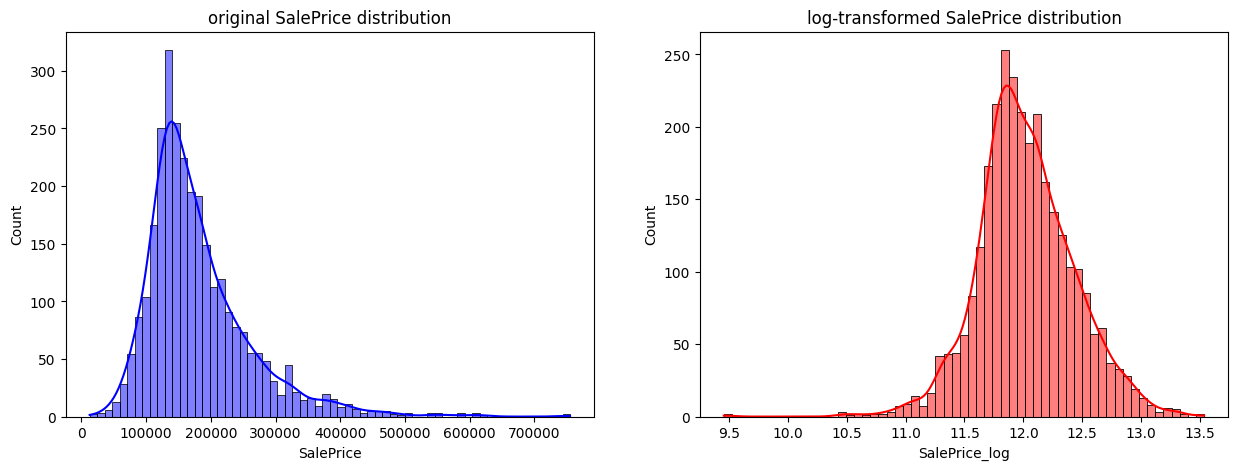

In [65]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

# original SalePrice distribution
sns.histplot(data = data, x = 'SalePrice', kde= True, color= 'blue', ax= axs[0])
axs[0].set_title("original SalePrice distribution")

# log_tranformed SalePrice distribution
sns.histplot(data = data, x = 'SalePrice_log', kde= True, color= 'red', ax= axs[1])
axs[1].set_title("log-transformed SalePrice distribution")


In [71]:
data['SalePrice_log']

0       12.278398
1       11.561725
2       12.055256
3       12.404928
4       12.154258
          ...    
2925    11.867104
2926    11.782960
2927    11.790565
2928    12.043560
2929    12.144203
Name: SalePrice_log, Length: 2930, dtype: float64

### Relationship between numerical values and saleprice

In [77]:

corr_matrix = data[numeric_cols].corr()

corr_matrix['SalePrice'].sort_values(ascending= False).head(10)

SalePrice         1.000000
Overall Qual      0.799262
Gr Liv Area       0.713633
Total Bsmt SF     0.648064
Garage Cars       0.647562
Garage Area       0.640138
1st Flr SF        0.621676
Year Built        0.558426
Full Bath         0.545604
Year Remod/Add    0.532974
Name: SalePrice, dtype: float64

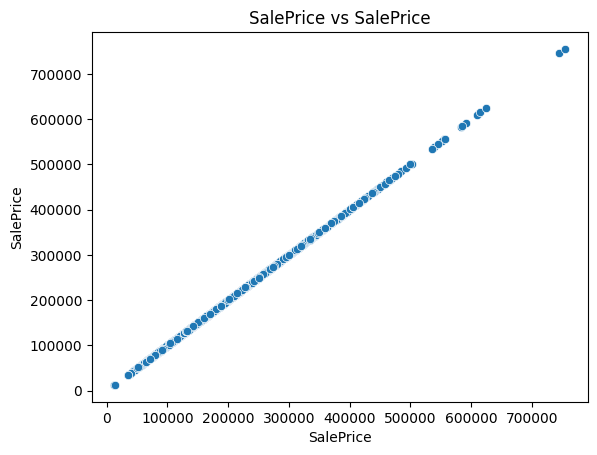

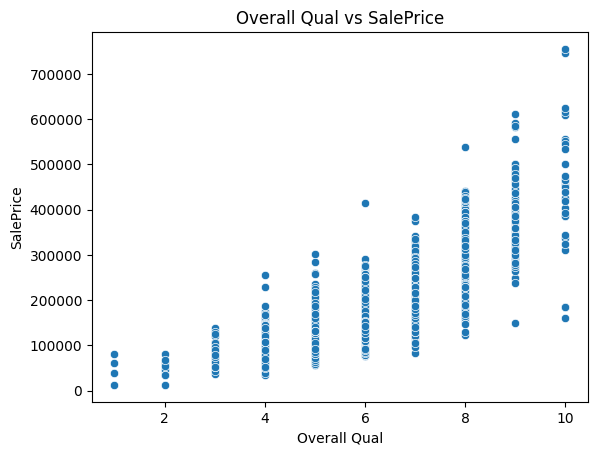

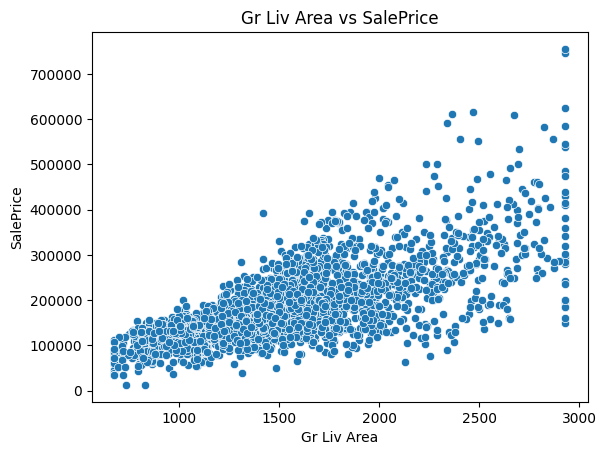

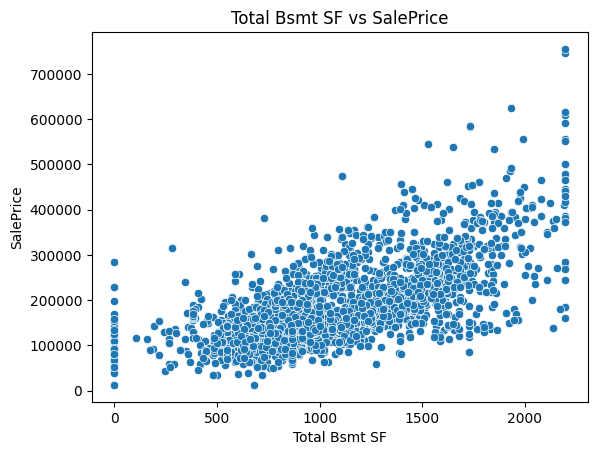

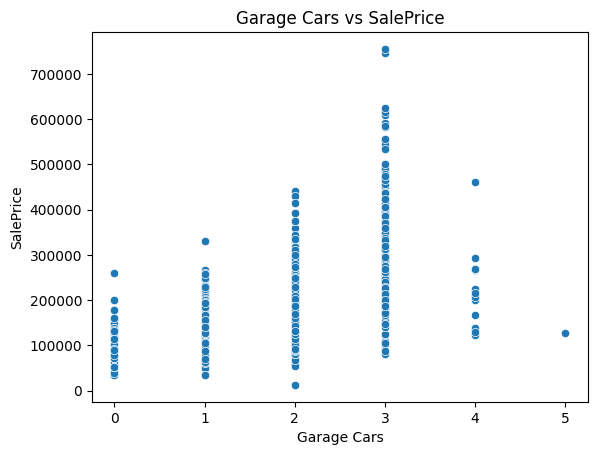

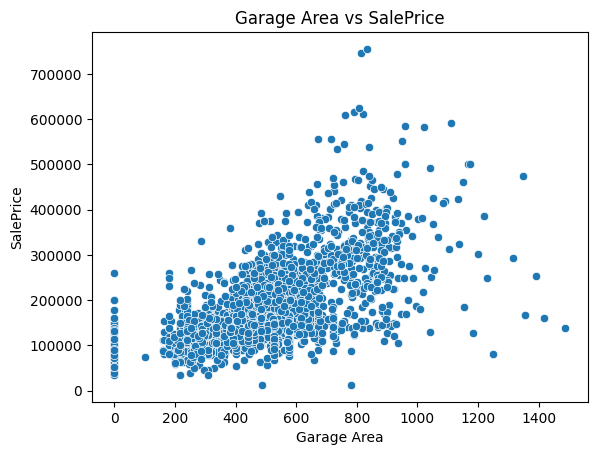

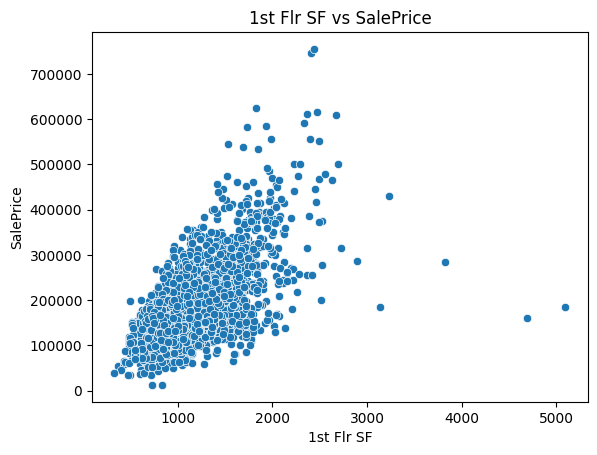

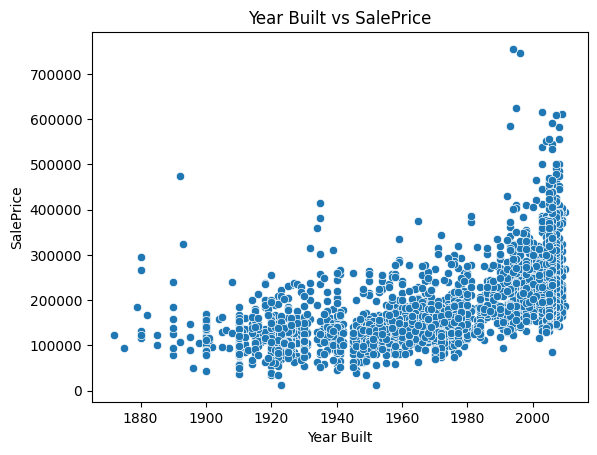

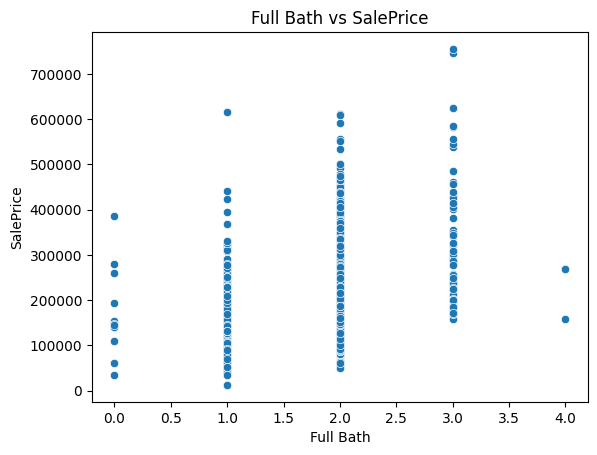

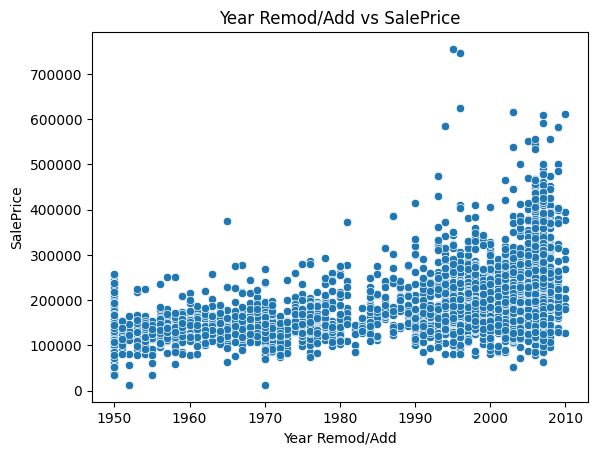

In [81]:
important_numeric = ['SalePrice','Overall Qual','Gr Liv Area','Total Bsmt SF','Garage Cars','Garage Area','1st Flr SF','Year Built','Full Bath','Year Remod/Add']

for col in important_numeric:
  plt.Figure(figsize=(6,4))
  sns.scatterplot(x = data[col], y = data['SalePrice'])
  plt.title(f'{col} vs SalePrice')
  plt.xlabel(col)
  plt.ylabel('SalePrice')
  plt.show()


### Relationship between categorical feature and SalePrice

In [87]:
categorical_features = [feature for feature in data.columns if data[feature].dtype == 'O']
categorical_features

# Example: Group by 'Neighborhood'
data.groupby('Neighborhood')['SalePrice'].mean().sort_values(ascending=False).head(10)


Neighborhood
NoRidge    330319.126761
StoneBr    324229.196078
NridgHt    322018.265060
GrnHill    280000.000000
Veenker    248314.583333
Timber     246599.541667
Somerst    229707.324176
ClearCr    208662.090909
Crawfor    207550.834951
CollgCr    201803.434457
Name: SalePrice, dtype: float64

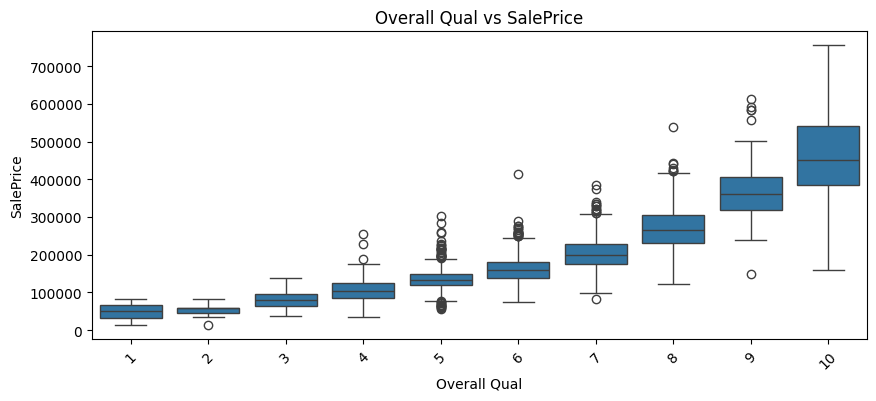

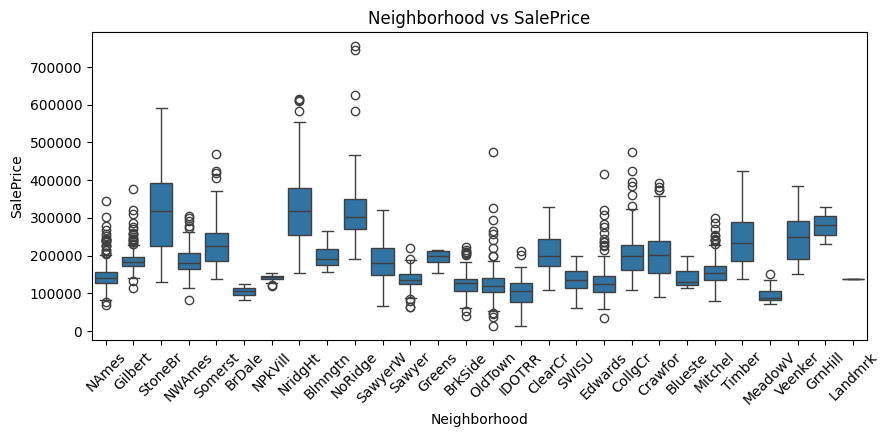

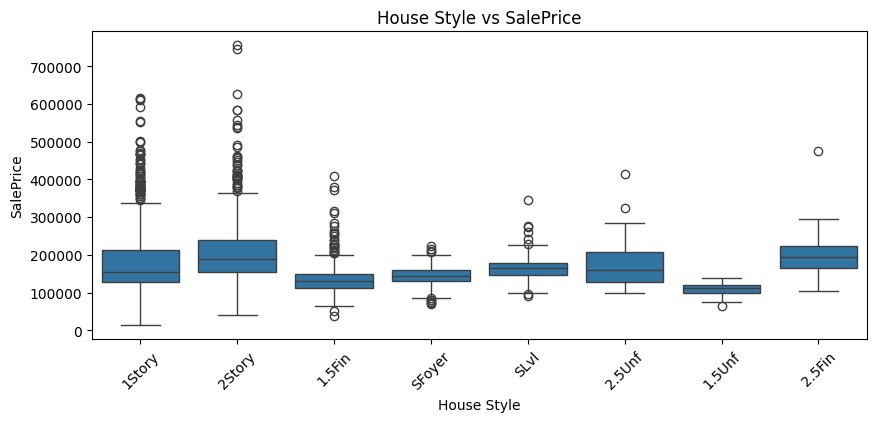

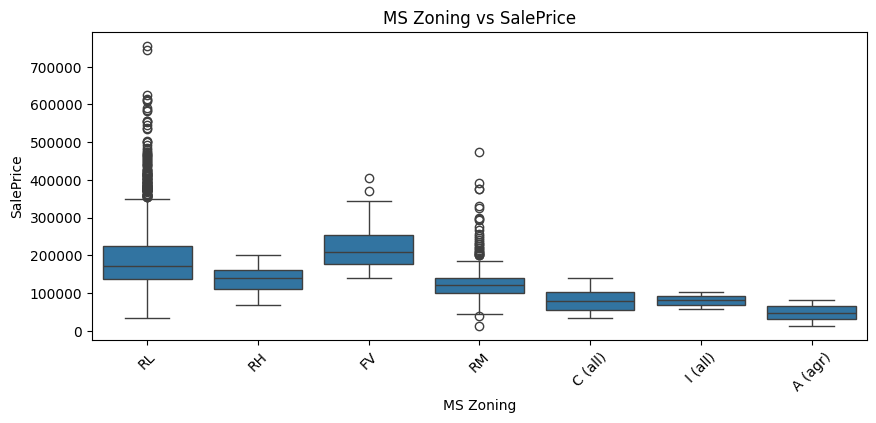

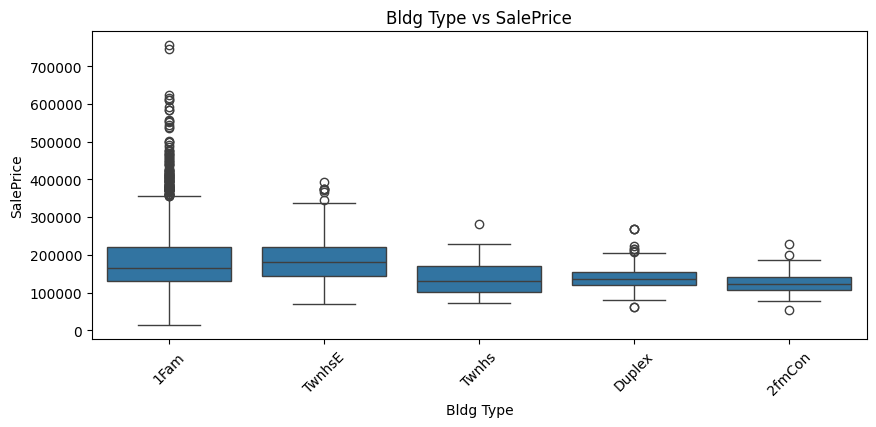

In [88]:
# Boxplots for categorical features
categorical_cols = ['Overall Qual', 'Neighborhood', 'House Style', 'MS Zoning', 'Bldg Type']

for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=col, y='SalePrice', data=data)
    plt.xticks(rotation=45)
    plt.title(f'{col} vs SalePrice')
    plt.show()


<Axes: xlabel='OverallQual_Grouped', ylabel='SalePrice'>

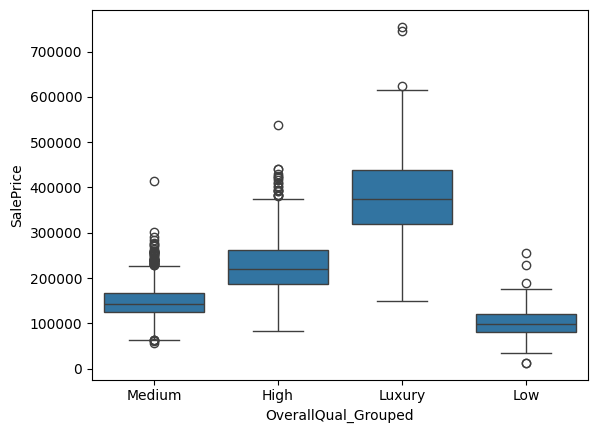

In [93]:
def map_qual(val):
    if val <= 4:
        return 'Low'
    elif val <= 6:
        return 'Medium'
    elif val <= 8:
        return 'High'
    else:
        return 'Luxury'

data['OverallQual_Grouped'] = data['Overall Qual'].apply(map_qual)


sns.boxplot(x='OverallQual_Grouped', y='SalePrice', data=data)


In [90]:
luxury = ['NoRidge', 'NridgHt', 'StoneBr']
mid = ['CollgCr', 'Somerst', 'Timber', 'Crawfor', 'Veenker', 'Gilbert', 'NWAmes']
low = ['IDOTRR', 'BrDale', 'MeadowV', 'OldTown', 'Edwards', 'SWISU', 'Blueste', 'NPkVill', 'NAmes', 'Mitchel']

def group_neighborhood(n):
    if n in luxury:
        return 'High'
    elif n in mid:
        return 'Medium'
    else:
        return 'Low'

data['Neighborhood_Grouped'] = data['Neighborhood'].apply(group_neighborhood)


Text(0.5, 1.0, 'Grouped Neighborhoods vs SalePrice')

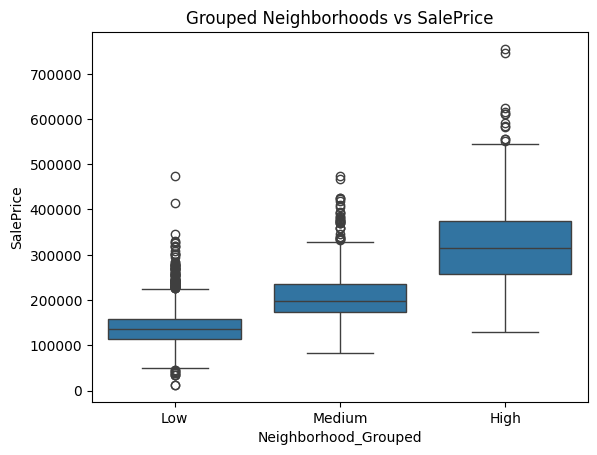

In [91]:
sns.boxplot(x='Neighborhood_Grouped', y='SalePrice', data=data)
plt.title('Grouped Neighborhoods vs SalePrice')


Grouping categories can reduce cardinality. Features like Neighborhood, which have over 25 categories, can make interpretation harder, slow down model training, and increase the risk of overfitting—especially when some categories have very few samples. Grouping similar categories reduces noise and helps improve generalization.

Some Categories Have Similar Effects
Example: OldTown, IDOTRR, BrDale might all have similarly low prices

Instead of treating them as separate one-hot columns, grouping captures the pattern better

#### general information about grouping categories
Better for Simpler Models
Linear models (Linear Regression, Logistic Regression) benefit a lot from grouping

Tree-based models (Random Forest, XGBoost) can handle many categories, but still benefit from reduced noise


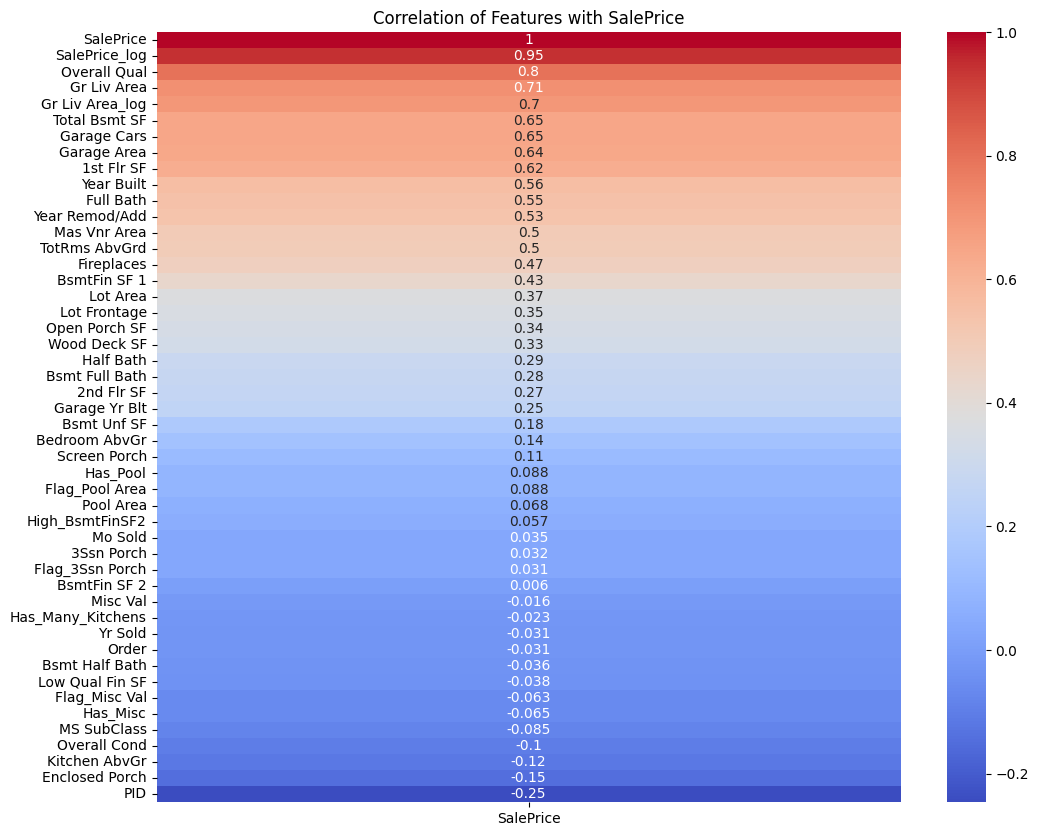

In [89]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
corr = data.corr(numeric_only=True)
sns.heatmap(corr[['SalePrice']].sort_values(by='SalePrice', ascending=False), annot=True, cmap='coolwarm')
plt.title("Correlation of Features with SalePrice")
plt.show()


Features with correlation > 0.5 or < -0.5 are highly predictive

Features with near-zero correlation are less useful for regression